In [1]:
# import table
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import json
%matplotlib inline

from pm4py.objects.log.importer.xes import importer
from pm4py.algo.filtering.log.variants import variants_filter
from dpv.util.converter import param_transform, downscale, merge
from dpv.variant_transformer import private_transform, public_transform
from dpv.variant_query import variant_query
from dpv.optimizer import release_optimizer
from dpv.data_utility import emd_utility, log_diff

In [2]:
# load data
eps_list = [2, 1, 0.1, 0.01]
del_list = ['0.01', '0.001', '0.0001', '0.00001', '0.000001']

var_13 = np.zeros((len(eps_list), len(del_list)))
total_13 = np.zeros((len(eps_list), len(del_list)))
var_sep = np.zeros((len(eps_list), len(del_list)))
total_sep = np.zeros((len(eps_list), len(del_list)))
var_12 = np.zeros((len(eps_list), len(del_list)))
total_12 = np.zeros((len(eps_list), len(del_list)))


for m, eps in enumerate(eps_list):
    for n, d in enumerate(del_list):

        f = open(f'BPIC13\logs/variants_gan_{eps}_{d}.json',)
        priv_log = json.load(f)
        var_13[m][n] = len(priv_log)
        total_13[m][n] = sum(priv_log.values())
        f.close()

        f = open(f'BPIC12\logs/variants_gan_{eps}_{d}.json',)
        priv_log = json.load(f)
        var_12[m][n] = len(priv_log)
        total_12[m][n] = sum(priv_log.values())
        f.close()

        if eps == 0.01 and d != '0.01':
            var_sep[m][n] = np.nan
            total_sep[m][n] = np.nan
        else:
            f = open(f'Sepsis\logs/variants_gan_{eps}_{d}.json',)
            priv_log = json.load(f)
            var_sep[m][n] = len(priv_log)
            total_sep[m][n] = sum(priv_log.values())
            f.close()

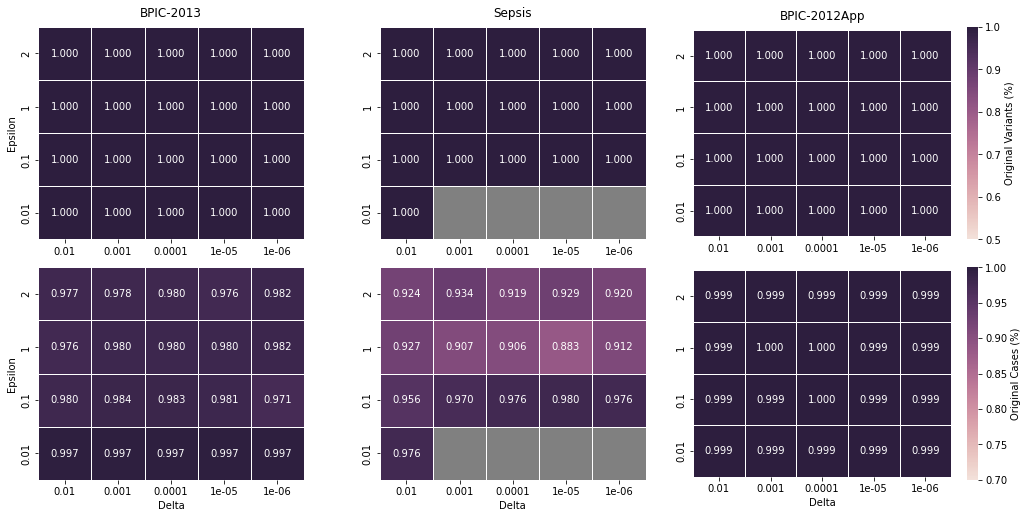

In [13]:
# create plots
f, ax = plt.subplots(2, 3, figsize=(14.8, 7.3))
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
cmap.set_bad('grey', 1.)
ax[0,0] = sns.heatmap(var_13/1511, ax=ax[0,0], vmin=0.5, vmax=1, cmap=cmap, square=True, annot=True, cbar=False, fmt='.3f', yticklabels=[2,1,0.1,0.01], xticklabels=[0.01,0.001,0.0001,0.00001,0.000001], linewidths=.5)
ax[0,1] = sns.heatmap(var_sep/846, ax=ax[0,1], vmin=0.5, vmax=1, cmap=cmap, square=True, mask=np.isnan(var_sep), annot=True, cbar=False, fmt='.3f', yticklabels=[2,1,0.1,0.01], xticklabels=[0.01,0.001,0.0001,0.00001,0.000001], linewidths=.5)
ax[0,2] = sns.heatmap(var_12/17, ax=ax[0,2], vmin=0.5, vmax=1, cmap=cmap, square=True, annot=True, fmt='.3f', cbar=True, yticklabels=[2,1,0.1,0.01], xticklabels=[0.01,0.001,0.0001,0.00001,0.000001], linewidths=.5, cbar_kws={'label': 'Original Variants (%)'})
ax[1,0] = sns.heatmap(total_13/7554, ax=ax[1,0], cmap=cmap, square=True, vmin=0.7, vmax=1, annot=True, cbar=False, fmt='.3f', yticklabels=[2,1,0.1,0.01], xticklabels=[0.01,0.001,0.0001,0.00001,0.000001], linewidths=.5)
ax[1,1] = sns.heatmap(total_sep/1050, ax=ax[1,1], cmap=cmap, square=True, vmin=0.7, vmax=1, annot=True, mask=np.isnan(total_sep), cbar=False, fmt='.3f', yticklabels=[2,1,0.1,0.01],xticklabels=[0.01,0.001,0.0001,0.00001,0.000001], linewidths=.5)
ax[1,2] = sns.heatmap(total_12/13087, ax=ax[1,2], cmap=cmap, vmin=0.7, vmax=1, square=True, annot=True, fmt='.3f', cbar=True, yticklabels=[2,1,0.1,0.01], xticklabels=[0.01,0.001,0.0001,0.00001,0.000001], linewidths=.5, cbar_kws={'label': 'Original Cases (%)'})
ax[0,0].set_title('BPIC-2013', pad=10)
ax[0,1].set_title('Sepsis', pad=10)
ax[0,2].set_title('BPIC-2012App', pad=10)
ax[1,0].set(xlabel="Delta", ylabel="Epsilon")
ax[0,0].set(ylabel="Epsilon")
ax[1,1].set(xlabel="Delta")
ax[1,2].set(xlabel="Delta")
f.tight_layout()
plt.savefig("ganTraVaS_numbers.pdf")
# sep: 846 1050
# 13: 1511 7554
# 12: 17 13087